#### Importar las librerias para el analisis 

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt


### Data columns:

name:The name of the game  

platform: Platform it was released  

r-date: date it was released  

score: average score given by critics (metascore)  

user score: average score given by users in the website  

developer: game developer  

genre: genre of the game (can be multiple)  

players: Number of players (some games don't have this information)  

critics: number of critics reviewing the game  

users: Number of metacritic users that reviewed the game  


### Crear la variable para leer el archivo .csv , mostrar las primeras 5 filas 

In [52]:
games = pd.read_csv("games-data.csv")
games.head()
games['user score'].unique()

games.drop(games.loc[games['user score']=='tbd'].index,inplace=True)

### Limpieza del set de datos 

In [53]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16658 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        16658 non-null  object
 1   platform    16658 non-null  object
 2   r-date      16658 non-null  object
 3   score       16658 non-null  int64 
 4   user score  16658 non-null  object
 5   developer   16658 non-null  object
 6   genre       16658 non-null  object
 7   players     16636 non-null  object
 8   critics     16658 non-null  int64 
 9   users       16658 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


### Eliminar las filas con valores nulos o faltantes

In [54]:
no_players = games[games['players'].isna()].shape
games.dropna(subset="players",inplace=True)


#### Cambiar tipos de datos

In [55]:
games[['user score','score']]  = games[['user score','score']].apply(lambda x: x.astype("float"),axis=1)

#### convertir r-date a datetime luego crear 3 columnas mas con año dia y mes 

In [56]:
games['r-date'] = games['r-date'].apply(pd.to_datetime)
games['day'] = games['r-date'].dt.day
games['year'] = games['r-date'].dt.year
games['month'] = games['r-date'].dt.month

In [57]:
games.rename(columns= {'r-date':'release_date','score':'rate','user score':'user_rate'},inplace=True)

In [58]:
games.head()


,name,platform,release_date,rate,user_rate,developer,genre,players,critics,users,day,year,month
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99.0,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,23,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98.0,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,20,2000,9
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98.0,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,29,2008,4
3,SoulCalibur,Dreamcast,1999-09-08,98.0,8.5,Namco,"Action,Fighting,3D",1-2,24,324,8,1999,9
4,Grand Theft Auto IV,Xbox360,2008-04-29,98.0,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,29,2008,4


### Top 10 mejores juegos por critica 

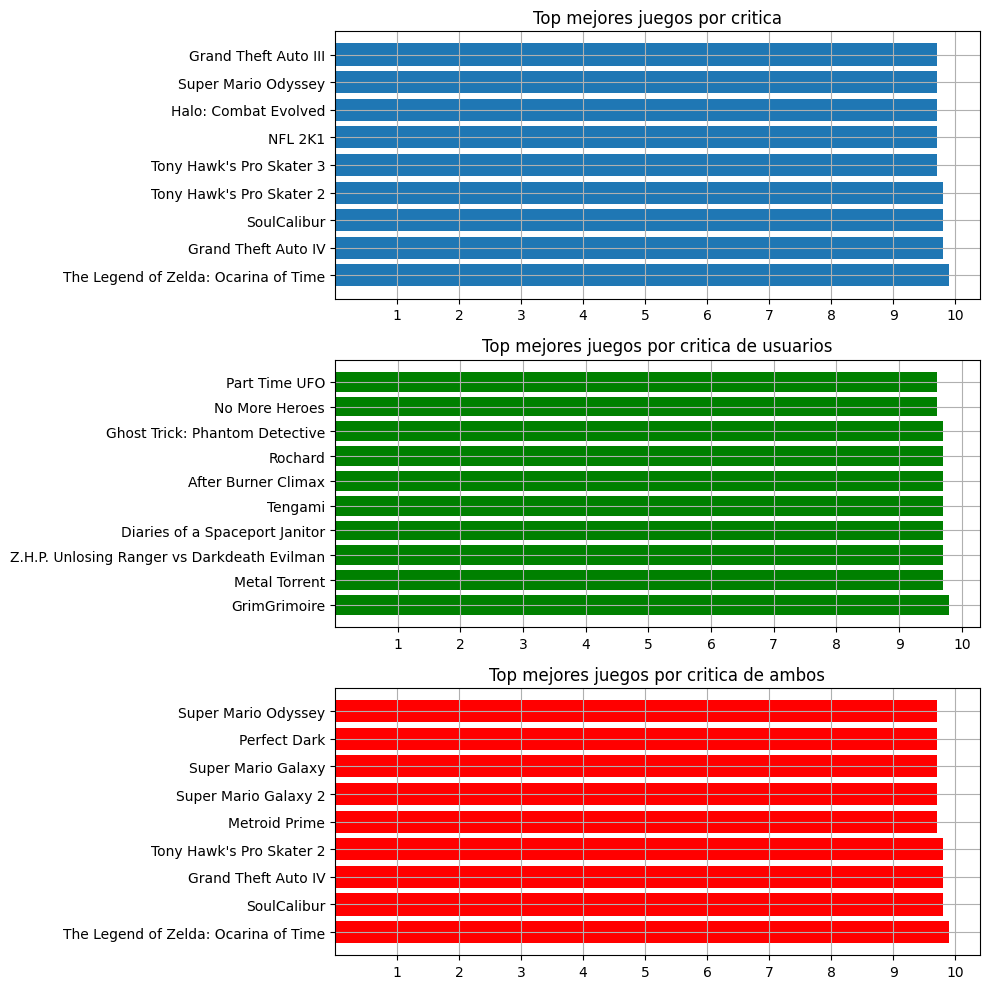

In [73]:
rate_by_critics = games.sort_values(by='rate',ascending=False).head(10)
rate_by_user = games.sort_values(by='user_rate',ascending=False).head(10)
rate_all = games.sort_values(by=['rate','user_rate'],ascending=False).head(10)
plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(3,1,1)
plt.title('Top mejores juegos por critica' )
plt.barh(rate_by_critics['name'],rate_by_critics['rate']/10)
plt.xticks(range(1,11))
plt.grid()
plt.subplot(3,1,2)
plt.title('Top mejores juegos por critica de usuarios')
plt.barh(rate_by_user['name'],rate_by_user['user_rate'],color='green')
plt.xticks(range(1,11))
plt.grid()
plt.subplot(3,1,3)
plt.title('Top mejores juegos por critica de ambos')
plt.barh(rate_all['name'],rate_all['rate']/10,color='red')
plt.xticks(range(1,11))
plt.grid()
plt.show()

In [85]:
games['year'].max()
games['year'].min()

1995

#### Que compañia ha hecho mas juegos 

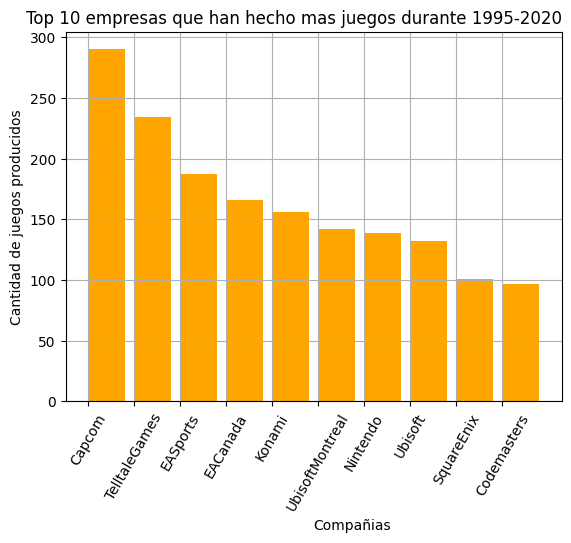

In [102]:
most_games = games.groupby('developer').count().sort_values(by="name",ascending=False).reset_index().head(10)
plt.title("Top 10 empresas que han hecho mas juegos durante 1995-2020",loc='right')
plt.ylabel("Cantidad de juegos producidos")
plt.xlabel("Compañias",horizontalalignment='left')
plt.xticks(rotation=60,horizontalalignment='center')
plt.grid()
plt.bar(most_games['developer'],most_games['name'],color='orange',align='edge')
plt.show()